In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# scharr与sobel算子思想一样，只是卷积核的系数不同，scharr算子提取边界也更加灵敏，能提取到更细小的边界，但请注意，越是灵敏就越是可能误判
K_x = np.array([
    [-3, 0, 3],
    [-10, 0, 10],
    [-3, 0, 3],
])
K_y = K_x.T

In [3]:
def corr2d(X: np.ndarray, K: np.ndarray, padding_same=False) -> np.ndarray:
    """二维互相关运算

    Args:
        X (np.ndarray): 原图 [H, W]
        K (np.ndarray): 卷积核 [K_H, K_W]
        padding_same (bool, optional): 是否padding为原图大小. Defaults to False.

    Returns:
        np.ndarray: 互相关结果 [H, W]
    """
    X_ = X.copy()
    h, w = K.shape
    if padding_same:
        pad_width = [(h//2, h//2), (w//2, w//2)]
        X_ = np.pad(X_, pad_width=pad_width, mode="constant", constant_values=0)
    Y = np.zeros((X_.shape[0] - h + 1, X_.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X_[i:i + h, j:j + w] * K).sum()
    return Y

In [4]:
def scharr(X: np.ndarray, K: np.ndarray):
    conv_result = corr2d(X.astype(np.float32), K.astype(np.float32), padding_same=True)
    clip_result = np.clip(conv_result, 0, 255)
    return clip_result.astype(np.uint8)

# read image

(612, 612)


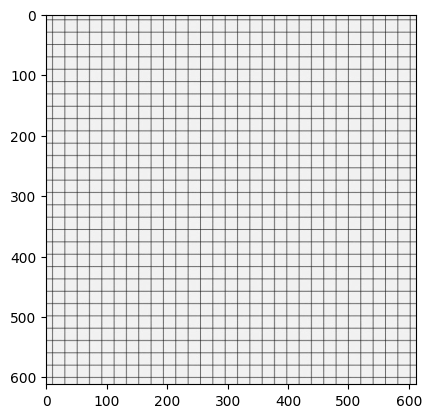

In [5]:
image = cv2.imread("../images/line.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)
plt.imshow(image, cmap="gray")

# x(去除x方向直线)

[[255   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]
 ...
 [255   0   0 ...  10  10   0]
 [255   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]]


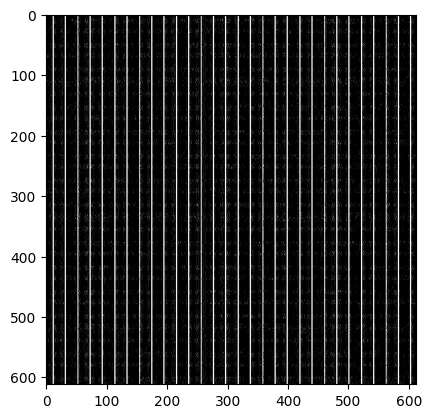

In [6]:
Gx_1 = cv2.Scharr(
    src=image,
    ddepth=-1,  # 输出图像深度
    dx=1,       # X方向，几阶导数
    dy=0,       # Y方向，几阶导数
    scale=1,
    delta=0,
    borderType=cv2.BORDER_CONSTANT,
)
print(Gx_1)
plt.imshow(Gx_1, cmap="gray")

[[255   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]
 ...
 [255   0   0 ...  10  10   0]
 [255   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]]


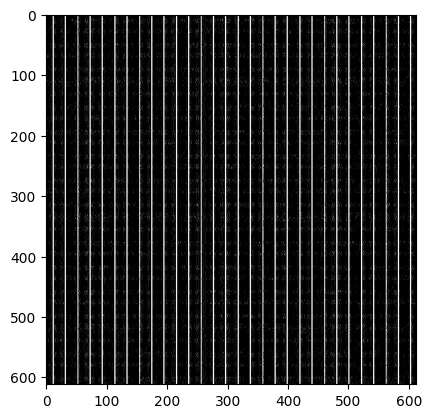

In [7]:
Gx_2 = scharr(image, K_x)
print(Gx_2)
plt.imshow(Gx_2, cmap="gray")

In [8]:
# 复现成功
np.all(Gx_1 == Gx_2)

True

# y(去除y方向直线)

[[255 255 255 ... 255 255 255]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   3  10 ...   0   0   0]
 [  0   3  13 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


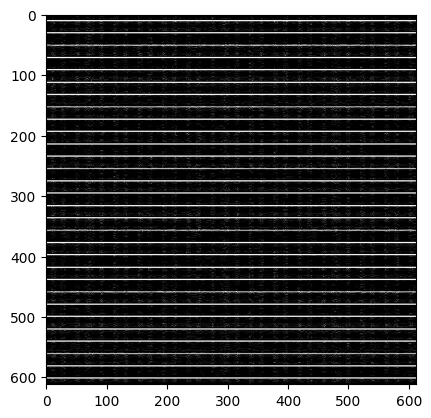

In [9]:
Gy_1 = cv2.Scharr(
    src=image,
    ddepth=-1,  # 输出图像深度
    dx=0,       # X方向，几阶导数
    dy=1,       # Y方向，几阶导数
    scale=1,
    delta=0,
    borderType=cv2.BORDER_CONSTANT,
)
print(Gy_1)
plt.imshow(Gy_1, cmap="gray")

[[255 255 255 ... 255 255 255]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   3  10 ...   0   0   0]
 [  0   3  13 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


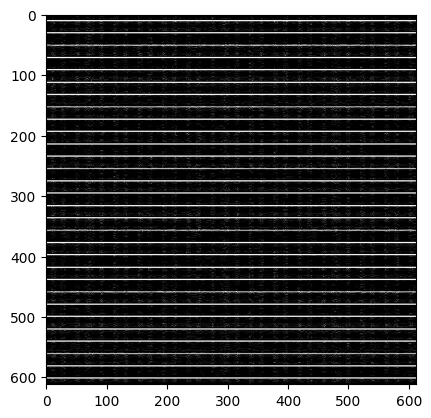

In [10]:
Gy_2 = scharr(image, K_y)
print(Gy_2)
plt.imshow(Gy_2, cmap="gray")

In [11]:
# 复现成功
np.all(Gy_1 == Gy_2)

True

# X,Y不能同时用

In [12]:
Gxy_1 = cv2.Scharr(
    src=image,
    ddepth=-1,  # 输出图像深度
    dx=1,       # X方向，几阶导数
    dy=1,       # Y方向，几阶导数
    scale=1,
    delta=0,
    borderType=cv2.BORDER_CONSTANT,
)
print(Gxy_1)
plt.imshow(Gxy_1, cmap="gray")

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\deriv.cpp:67: error: (-215:Assertion failed) dx >= 0 && dy >= 0 && dx+dy == 1 in function 'cv::getScharrKernels'
